# BIFET verification example_light_EL

In example EL

we propose a pure spectral advection (energy loss) testing case with (1+n) dimension setting

the PDE equation reads

$-\nabla_\mathbf{E}\cdot(\mathcal{E}_{\mathbf{qq}} u) = f(\mathbf{q})$, $E_i = e^{q_i}$

we apply homogeneous Dirichlet boundary condition in $\mathbf{x}$ domain

$u = 0$, $\mathbf{q}\in\Omega^+_q$

By imposing an analytical solution

$u(\xi) = Ce^{-n_\xi(\xi - \xi_{min})} + \frac{e^{\xi_\min(n_\xi+s_\xi)}}{\alpha_\xi(s_\xi-1)}e^{\xi(1-s_\xi-n_\xi)}$

we can derive $f(\mathbf{q})$ (and $C$) manually from $u(\mathbf{x}) = \prod_\xi u(\xi)$

here we present comparison and relative error estimation between analytical and numerical solutions

* $\xi_{min} = -1$, $\xi_{max} = 1$
* $E_{ii} = -\alpha_i e^{n_i(q_i-q_{i,min})}$

the final L2 errors are estimated internally with deal.II functions

## 1. time-independent solver

Populating the interactive namespace from numpy and matplotlib


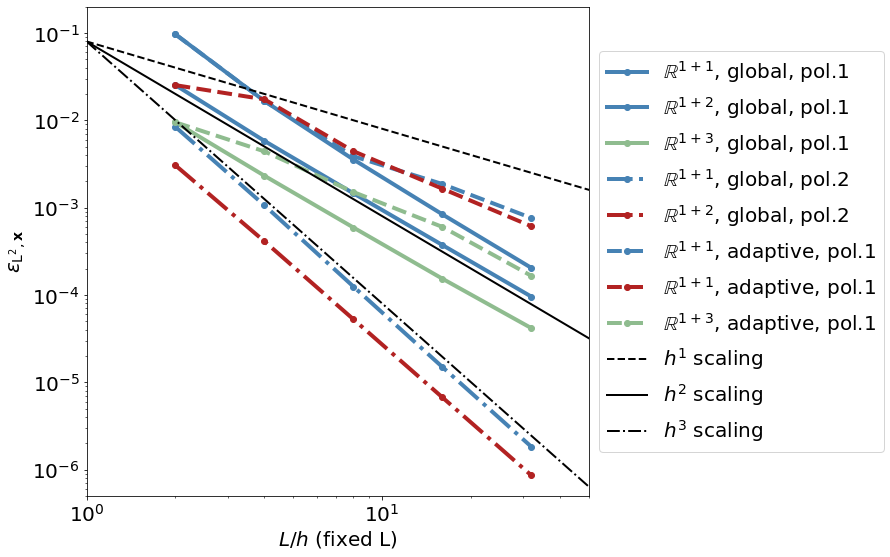

In [1]:
%pylab inline
import matplotlib.pyplot as plt

# dim 1+1
# refine global
# pol. 1
e_1d_rg1 = array(matrix('0    0.0963859;\
1    0.016603;\
2    0.00355481;\
3    0.000836782;\
4    0.000203894'))

# dim 1+1
# refine adaptive
# pol. 1
e_1d_ra1 = array(matrix('0    0.0963859;\
1    0.016603;\
2    0.00387057;\
3    0.00186111;\
4    0.000760538'))

# dim 1+1
# refine global
# pol. 2
e_1d_rg2 = array(matrix('0    0.0083933;\
1    0.00106049;\
2    0.000124651;\
3    1.49446e-05;\
4    1.82549e-06'))


e_2d_rg1 = array(matrix('0       0.025245;\
1       0.00580139;\
2       0.001457;\
3       0.000372701;\
4       9.55721e-05'))

e_2d_ra1 = array(matrix('0       0.025245;\
1       0.0173587;\
2       0.00442249;\
3       0.00164635;\
4       0.00061119'))

e_2d_rg2 = array(matrix('0       0.00304407;\
1       0.000410534;\
2       5.25737e-05;\
3       6.70728e-06;\
4       8.57548e-07'))

# error list copied from Dxxtrial output

# dim 1+3
# refine adaptive
# pol. 1
e_3d_ra1 = array(matrix('0    0.00947488;\
1    0.00440104;\
2    0.00150723;\
3    0.000600534;\
4    0.000165424'))

e_3d_rg1 = array(matrix('0    0.00947488;\
1    0.00231517;\
2    0.000591311;\
3    0.000153409;\
4    0.000041648'))

fig1, ax1 = plt.subplots(figsize=(9,9))
#matplotlib.pyplot.grid(True, which="both")
ylim = (5.e-7,0.2)

g1 = ax1.plot(2**(e_1d_rg1[:,0]+1),e_1d_rg1[:,1],
              marker='o',markersize=6,c='steelblue',linewidth=4,
              label=r'$\mathbb{R}^{1+1}$, global, pol.1')
g2 = ax1.plot(2**(e_2d_rg1[:,0]+1),e_2d_rg1[:,1],
              marker='o',markersize=6,c='steelblue',linewidth=4,
              label=r'$\mathbb{R}^{1+2}$, global, pol.1')
g3 = ax1.plot(2**(e_3d_rg1[:,0]+1),e_3d_rg1[:,1],
              marker='o',markersize=6,c='darkseagreen',linewidth=4,
              label=r'$\mathbb{R}^{1+3}$, global, pol.1')

g12 = ax1.plot(2**(e_1d_rg2[:,0]+1),e_1d_rg2[:,1],
               marker='o',markersize=6,c='steelblue',linewidth=4,linestyle='-.',
               label=r'$\mathbb{R}^{1+1}$, global, pol.2')
g22 = ax1.plot(2**(e_2d_rg2[:,0]+1),e_2d_rg2[:,1],
               marker='o',markersize=6,c='firebrick',linewidth=4,linestyle='-.',
               label=r'$\mathbb{R}^{1+2}$, global, pol.2')

a1 = ax1.plot(2**(e_1d_ra1[:,0]+1),e_1d_ra1[:,1],
              marker='o',markersize=6,c='steelblue',linewidth=4,linestyle='--',
              label=r'$\mathbb{R}^{1+1}$, adaptive, pol.1')
a2 = ax1.plot(2**(e_2d_ra1[:,0]+1),e_2d_ra1[:,1],
              marker='o',markersize=6,c='firebrick',linewidth=4,linestyle='--',
              label=r'$\mathbb{R}^{1+1}$, adaptive, pol.1')
a3 = ax1.plot(2**(e_3d_ra1[:,0]+1),e_3d_ra1[:,1],
              marker='o',markersize=6,c='darkseagreen',linewidth=4,linestyle='--',
              label=r'$\mathbb{R}^{1+3}$, adaptive, pol.1')

x0 = linspace(1,300,20)
l1 = ax1.plot(x0,0.08/x0**1,color='k',linestyle='--',linewidth=2,label=r'$h^{1}$ scaling')
l2 = ax1.plot(x0,0.08/x0**2,color='k',linestyle='-',linewidth=2,label=r'$h^{2}$ scaling')
l3 = ax1.plot(x0,0.08/x0**3,color='k',linestyle='-.',linewidth=2,label=r'$h^{3}$ scaling')

ax1.set_xscale("log", nonposx='clip')
ax1.set_yscale("log", nonposy='clip')

lgd = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=20)
ax1.set_xlim((1,50))
ax1.set_ylim(ylim)
ax1.set_xlabel(r'$L/h$ (fixed L)',fontsize='20')
ax1.set_ylabel(r'$\epsilon_{\mathrm{L}^2,\mathbf{x}}$',fontsize='20')
ax1.tick_params(axis='both', which='major', labelsize='20')

#fig1.tight_layout()

savefig('EL_err.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

## 2. time-dependent solver

#### fixed time difference (evolution check)

Populating the interactive namespace from numpy and matplotlib
[2.13818384 2.0231496  2.00493409 2.00116036 2.00028268]


/Users/jiaxin/lab/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['ylim']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


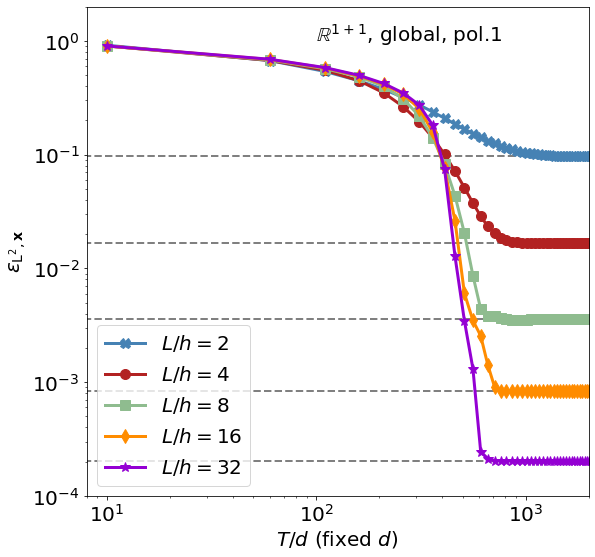

In [2]:
%pylab inline
import matplotlib.pyplot as plt

threads = linspace(1,20,num=20)

err_lv0 = array(matrix('10	0.916381;\
60	0.671066;\
110	0.539412;\
160	0.446346;\
210	0.374953;\
260	0.318603;\
310	0.273691;\
360	0.237798;\
410	0.209115;\
460	0.186217;\
510	0.167963;\
560	0.153428;\
610	0.141866;\
660	0.132673;\
710	0.125364;\
760	0.11955;\
810	0.114922;\
860	0.111234;\
910	0.108291;\
960	0.10594;\
1010	0.10406;\
1060	0.102554;\
1110	0.101347;\
1160	0.100378;\
1210	0.0995997;\
1260	0.0989741;\
1310	0.098471;\
1360	0.098066;\
1410	0.0977401;\
1460	0.0974775;\
1510	0.097266;\
1560	0.0970955;\
1610	0.0969581;\
1660	0.0968474;\
1710	0.0967581;\
1760	0.0966861;\
1810	0.096628;\
1860	0.0965812;\
1910	0.0965434;\
1960	0.0965129;\
2010	0.0964884;\
2060	0.0964685'))

err_lv1 = array(matrix('10	0.903699;\
60	0.673429;\
110	0.552271;\
160	0.447037;\
210	0.34969;\
260	0.264662;\
310	0.19507;\
360	0.141;\
410	0.100657;\
460	0.0715594;\
510	0.051242;\
560	0.0375608;\
610	0.0287553;\
660	0.0233914;\
710	0.0203044;\
760	0.0186045;\
810	0.0176885;\
860	0.0171954;\
910	0.016927;\
960	0.0167791;\
1010	0.016697;\
1060	0.0166514;\
1110	0.0166264;\
1160	0.016613;\
1210	0.0166062;\
1260	0.0166029;\
1310	0.0166016;\
1360	0.0166012;\
1410	0.0166013;\
1460	0.0166016;\
1510	0.0166019;\
1560	0.0166022;\
1610	0.0166024;\
1660	0.0166026;\
1710	0.0166027;\
1760	0.0166028;\
1810	0.0166029;\
1860	0.0166029;\
1910	0.016603;\
1960	0.016603;\
2010	0.016603;\
2060	0.016603'))

err_lv2 = array(matrix('10	0.901979;\
60	0.679612;\
110	0.569913;\
160	0.483075;\
210	0.399269;\
260	0.30941;\
310	0.219384;\
360	0.14122;\
410	0.0824083;\
460	0.0434009;\
510	0.0203982;\
560	0.00865305;\
610	0.00439416;\
660	0.00384851;\
710	0.00379662;\
760	0.00367436;\
810	0.00357806;\
860	0.00354031;\
910	0.0035375;\
960	0.00354513;\
1010	0.00355201;\
1060	0.00355569;\
1110	0.00355691;\
1160	0.00355686;\
1210	0.00355636;\
1260	0.00355583;\
1310	0.00355541;\
1360	0.00355512;\
1410	0.00355495;\
1460	0.00355486;\
1510	0.00355482;\
1560	0.0035548;\
1610	0.0035548;\
1660	0.0035548;\
1710	0.0035548;\
1760	0.00355481;\
1810	0.00355481;\
1860	0.00355481;\
1910	0.00355481;\
1960	0.00355481;\
2010	0.00355481;\
2060	0.00355481'))

err_lv3 = array(matrix('10	0.902227;\
60	0.686852;\
110	0.578484;\
160	0.492545;\
210	0.41537;\
260	0.340493;\
310	0.254373;\
360	0.157757;\
410	0.0756488;\
460	0.0260788;\
510	0.00603697;\
560	0.00348536;\
610	0.002556;\
660	0.00141059;\
710	0.000913205;\
760	0.000842493;\
810	0.000841149;\
860	0.00083952;\
910	0.000837839;\
960	0.000837051;\
1010	0.000836797;\
1060	0.000836749;\
1110	0.000836757;\
1160	0.000836771;\
1210	0.000836779;\
1260	0.000836782;\
1310	0.000836783;\
1360	0.000836783;\
1410	0.000836782;\
1460	0.000836782;\
1510	0.000836782;\
1560	0.000836782;\
1610	0.000836782;\
1660	0.000836782;\
1710	0.000836782;\
1760	0.000836782;\
1810	0.000836782;\
1860	0.000836782;\
1910	0.000836782;\
1960	0.000836782;\
2010	0.000836782;\
2060	0.000836782'))

err_lv4 = array(matrix('10	0.903133;\
60	0.68984;\
110	0.582787;\
160	0.498276;\
210	0.422261;\
260	0.348538;\
310	0.273307;\
360	0.181285;\
410	0.0746344;\
460	0.0127283;\
510	0.00346053;\
560	0.00131284;\
610	0.000244478;\
660	0.000212815;\
710	0.000204593;\
760	0.000203849;\
810	0.000203873;\
860	0.000203893;\
910	0.000203895;\
960	0.000203894;\
1010	0.000203894;\
1060	0.000203894;\
1110	0.000203894;\
1160	0.000203894;\
1210	0.000203894;\
1260	0.000203894;\
1310	0.000203894;\
1360	0.000203894;\
1410	0.000203894;\
1460	0.000203894;\
1510	0.000203894;\
1560	0.000203894;\
1610	0.000203894;\
1660	0.000203894;\
1710	0.000203894;\
1760	0.000203894;\
1810	0.000203894;\
1860	0.000203894;\
1910	0.000203894;\
1960	0.000203894;\
2010	0.000203894;\
2060	0.000203894'))

e_1d_rg1 = array(matrix('0    0.0963859;\
1    0.016603;\
2    0.00355481;\
3    0.000836782;\
4    0.000203894'))

print (2**(e_1d_rg1[:,1]+1))

fig1, ax1 = plt.subplots(figsize=(9,9))

l0 = ax1.plot((0,2000),(e_1d_rg1[0,1],e_1d_rg1[0,1]),color='grey',linestyle='--',linewidth=2)
l1 = ax1.plot((0,2000),(e_1d_rg1[1,1],e_1d_rg1[1,1]),color='grey',linestyle='--',linewidth=2)
l2 = ax1.plot((0,2000),(e_1d_rg1[2,1],e_1d_rg1[2,1]),color='grey',linestyle='--',linewidth=2)
l3 = ax1.plot((0,2000),(e_1d_rg1[3,1],e_1d_rg1[3,1]),color='grey',linestyle='--',linewidth=2)
l4 = ax1.plot((0,2000),(e_1d_rg1[4,1],e_1d_rg1[4,1]),color='grey',linestyle='--',linewidth=2)

c0 = ax1.plot (err_lv0[:,0],err_lv0[:,1],
               marker='X',markersize=10,c='steelblue',linewidth=3,
               label=r'$L/h = 2$')
c1 = ax1.plot (err_lv1[:,0],err_lv1[:,1],
               marker='o',markersize=10,c='firebrick',linewidth=3,
               label=r'$L/h = 4$')
c2 = ax1.plot (err_lv2[:,0],err_lv2[:,1],
               marker='s',markersize=10,c='darkseagreen',linewidth=3,
               label=r'$L/h = 8$')
c3 = ax1.plot (err_lv3[:,0],err_lv3[:,1],
               marker='d',markersize=10,c='darkorange',linewidth=3,
               label=r'$L/h = 16$')
c4 = ax1.plot (err_lv4[:,0],err_lv4[:,1],
               marker='*',markersize=10,c='darkviolet',linewidth=3,
               label=r'$L/h = 32$')
ax1.legend(loc=3,fontsize='20')
ax1.set_xlim((8,2000))
ax1.set_ylim((0.0001,2))
ax1.set_xscale("log", nonposx='clip')
ax1.set_yscale("log", nonposy='clip')
ax1.set_xlabel(r'$T/d$ (fixed $d$)',fontsize='20')
ax1.set_ylabel(r'$\epsilon_{\mathrm{L}^2,\mathbf{x}}$',fontsize='20')
ax1.tick_params(axis='both', which='major', labelsize='20')

ax1.text(100,1,r'$\mathbb{R}^{1+1}$, global, pol.1',fontsize=20)
#fig1.tight_layout()

savefig('EL_evo.pdf')

#### fixed total time (convergence check)

Populating the interactive namespace from numpy and matplotlib
[2.13818384 2.0231496  2.00493409 2.00116036 2.00028268]


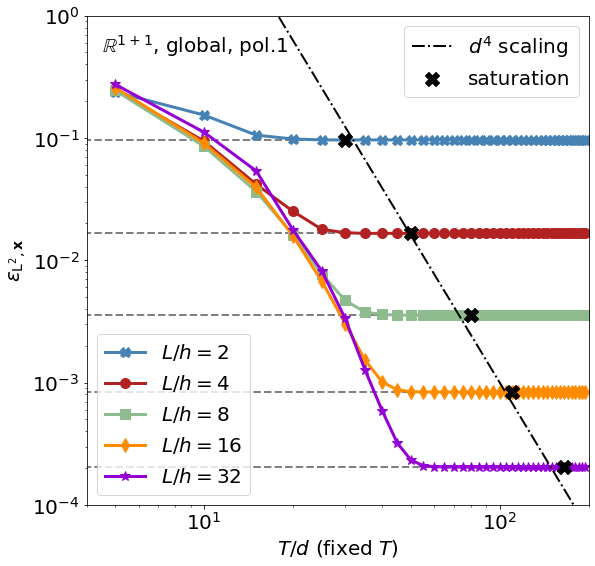

In [3]:
%pylab inline
import matplotlib.pyplot as plt

err_lv0 = array(matrix('5       0.237911;\
10      0.15386;\
15      0.105488;\
20      0.0981318;\
25      0.0963907;\
30      0.0963859;\
35      0.0963859;\
40      0.0963859;\
45      0.0963859;\
50      0.0963859;\
55      0.0963859;\
60      0.0963859;\
65      0.0963859;\
70      0.0963859;\
75      0.0963859;\
80      0.0963859;\
85      0.0963859;\
90      0.0963859;\
95      0.0963859;\
100     0.0963859;\
105     0.0963859;\
110     0.0963859;\
115     0.0963859;\
120     0.0963859;\
125     0.0963859;\
130     0.0963859;\
135     0.0963859;\
140     0.0963859;\
145     0.0963859;\
150     0.0963859;\
155     0.0963859;\
160     0.0963859;\
165     0.0963859;\
170     0.0963859;\
175     0.0963859;\
180     0.0963859;\
185     0.0963859;\
190     0.0963859;\
195     0.0963859'))

err_lv1 = array(matrix('5       0.246887;\
10      0.0940265;\
15      0.0418327;\
20      0.0250985;\
25      0.0179087;\
30      0.0168015;\
35      0.0165899;\
40      0.0166055;\
45      0.0166028;\
50      0.016603;\
55      0.016603;\
60      0.016603;\
65      0.016603;\
70      0.016603;\
75      0.016603;\
80      0.016603;\
85      0.016603;\
90      0.016603;\
95      0.016603;\
100     0.016603;\
105     0.016603;\
110     0.016603;\
115     0.016603;\
120     0.016603;\
125     0.016603;\
130     0.016603;\
135     0.016603;\
140     0.016603;\
145     0.016603;\
150     0.016603;\
155     0.016603;\
160     0.016603;\
165     0.016603;\
170     0.016603;\
175     0.016603;\
180     0.016603;\
185     0.016603;\
190     0.016603;\
195     0.016603'))

err_lv2 = array(matrix('5       0.244943;\
10      0.0851936;\
15      0.0364654;\
20      0.0161772;\
25      0.00771441;\
30      0.00470072;\
35      0.00377384;\
40      0.0036066;\
45      0.00355581;\
50      0.00355905;\
55      0.00355411;\
60      0.00355513;\
65      0.00355487;\
70      0.00355477;\
75      0.00355483;\
80      0.00355481;\
85      0.00355481;\
90      0.00355481;\
95      0.00355481;\
100     0.00355481;\
105     0.00355481;\
110     0.00355481;\
115     0.00355481;\
120     0.00355481;\
125     0.00355481;\
130     0.00355481;\
135     0.00355481;\
140     0.00355481;\
145     0.00355481;\
150     0.00355481;\
155     0.00355481;\
160     0.00355481;\
165     0.00355481;\
170     0.00355481;\
175     0.00355481;\
180     0.00355481;\
185     0.00355481;\
190     0.00355481;\
195     0.00355481'))

err_lv3 = array(matrix('5       0.258141;\
10      0.0904364;\
15      0.0394611;\
20      0.015777;\
25      0.0067396;\
30      0.00303925;\
35      0.00153113;\
40      0.00101458;\
45      0.000871714;\
50      0.000845343;\
55      0.000837234;\
60      0.000837878;\
65      0.000836456;\
70      0.000837213;\
75      0.000836623;\
80      0.000836945;\
85      0.000836719;\
90      0.00083683;\
95      0.000836764;\
100     0.000836791;\
105     0.00083678;\
110     0.000836782;\
115     0.000836783;\
120     0.000836782;\
125     0.000836783;\
130     0.000836782;\
135     0.000836782;\
140     0.000836782;\
145     0.000836782;\
150     0.000836782;\
155     0.000836782;\
160     0.000836782;\
165     0.000836782;\
170     0.000836782;\
175     0.000836782;\
180     0.000836782;\
185     0.000836782;\
190     0.000836782;\
195     0.000836782'))

err_lv4 = array(matrix('5       0.274451;\
10      0.11124;\
15      0.0537823;\
20      0.0176537;\
25      0.00820142;\
30      0.00334784;\
35      0.00127324;\
40      0.00059099;\
45      0.000321789;\
50      0.000233129;\
55      0.000209622;\
60      0.000205403;\
65      0.000203954;\
70      0.000204129;\
75      0.0002038;\
80      0.000204014;\
85      0.000203831;\
90      0.000203964;\
95      0.000203855;\
100     0.000203934;\
105     0.000203871;\
110     0.000203916;\
115     0.000203881;\
120     0.000203906;\
125     0.000203887;\
130     0.0002039;\
135     0.00020389;\
140     0.000203897;\
145     0.000203892;\
150     0.000203895;\
155     0.000203893;\
160     0.000203895;\
165     0.000203894;\
170     0.000203894;\
175     0.000203894;\
180     0.000203894;\
185     0.000203894;\
190     0.000203894;\
195     0.000203894'))

e_1d_rg1 = array(matrix('0    0.0963859;\
1    0.016603;\
2    0.00355481;\
3    0.000836782;\
4    0.000203894'))

print (2**(e_1d_rg1[:,1]+1))

fig1, ax1 = plt.subplots(figsize=(9,9))

l0 = ax1.plot((0,2000),(e_1d_rg1[0,1],e_1d_rg1[0,1]),color='grey',linestyle='--',linewidth=2)
l1 = ax1.plot((0,2000),(e_1d_rg1[1,1],e_1d_rg1[1,1]),color='grey',linestyle='--',linewidth=2)
l2 = ax1.plot((0,2000),(e_1d_rg1[2,1],e_1d_rg1[2,1]),color='grey',linestyle='--',linewidth=2)
l3 = ax1.plot((0,2000),(e_1d_rg1[3,1],e_1d_rg1[3,1]),color='grey',linestyle='--',linewidth=2)
l4 = ax1.plot((0,2000),(e_1d_rg1[4,1],e_1d_rg1[4,1]),color='grey',linestyle='--',linewidth=2)

c0 = ax1.plot (err_lv0[:,0],err_lv0[:,1],
               marker='X',markersize=10,c='steelblue',linewidth=3,
               label=r'$L/h = 2$')
c1 = ax1.plot (err_lv1[:,0],err_lv1[:,1],
               marker='o',markersize=10,c='firebrick',linewidth=3,
               label=r'$L/h = 4$')
c2 = ax1.plot (err_lv2[:,0],err_lv2[:,1],
               marker='s',markersize=10,c='darkseagreen',linewidth=3,
               label=r'$L/h = 8$')
c3 = ax1.plot (err_lv3[:,0],err_lv3[:,1],
               marker='d',markersize=10,c='darkorange',linewidth=3,
               label=r'$L/h = 16$')
c4 = ax1.plot (err_lv4[:,0],err_lv4[:,1],
               marker='*',markersize=10,c='darkviolet',linewidth=3,
               label=r'$L/h = 32$')

ax1.legend(loc=3,fontsize='20')
ax1.set_xlim((4,200))
ax1.set_ylim((0.0001,1))
ax1.set_xscale("log", nonposx='clip')
ax1.set_yscale("log", nonposy='clip')
ax1.set_xlabel(r'$T/d$ (fixed $T$)',fontsize='20')
ax1.set_ylabel(r'$\epsilon_{\mathrm{L}^2,\mathbf{x}}$',fontsize='20')
ax1.tick_params(axis='both', which='major', labelsize='20')

ax2 = ax1.twinx()

s = array(matrix('30      0.0965073;\
50      0.016603;\
80      0.00355481;\
110     0.000836782;\
165     0.000203894'))
ax2.scatter (s[:,0],s[:,1],marker='X',s=200,c='black',label='saturation')

s = np.linspace(1,3000,200)
ax2.plot(s,1.0e+5*s**(-4),linestyle='-.',linewidth=2,color='k',label=r'$d^{4}$ scaling')

ax2.set_yscale("log", nonposy='clip')
ax2.set_ylim((0.0001,1))
ax2.legend(loc=1,fontsize='20')
plt.axis('off')

ax1.text(4.5,0.5,r'$\mathbb{R}^{1+1}$, global, pol.1',fontsize=20)
#fig1.tight_layout()

savefig('EL_conv.pdf')

## execute the corresponding example and check if above figures can be recovered